ดาวโหลด packages และ dependies สำหรับโปรเจ็ค

In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.207 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.6/112.6 GB disk)


สร้าง folder เปล่าเพื่อเตรียมดาวโหลด dataset ที่อัพโหลดขึ้น Roboflow

In [ ]:
import os

HOME = os.getcwd()
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


ดาวโหลด dataset จาก Roboflow

1. ไปที่หน้าโปรเจ็คของเราบน roboflow และกดปุ่ม download dataset ตรงมุมขวาบนของ website

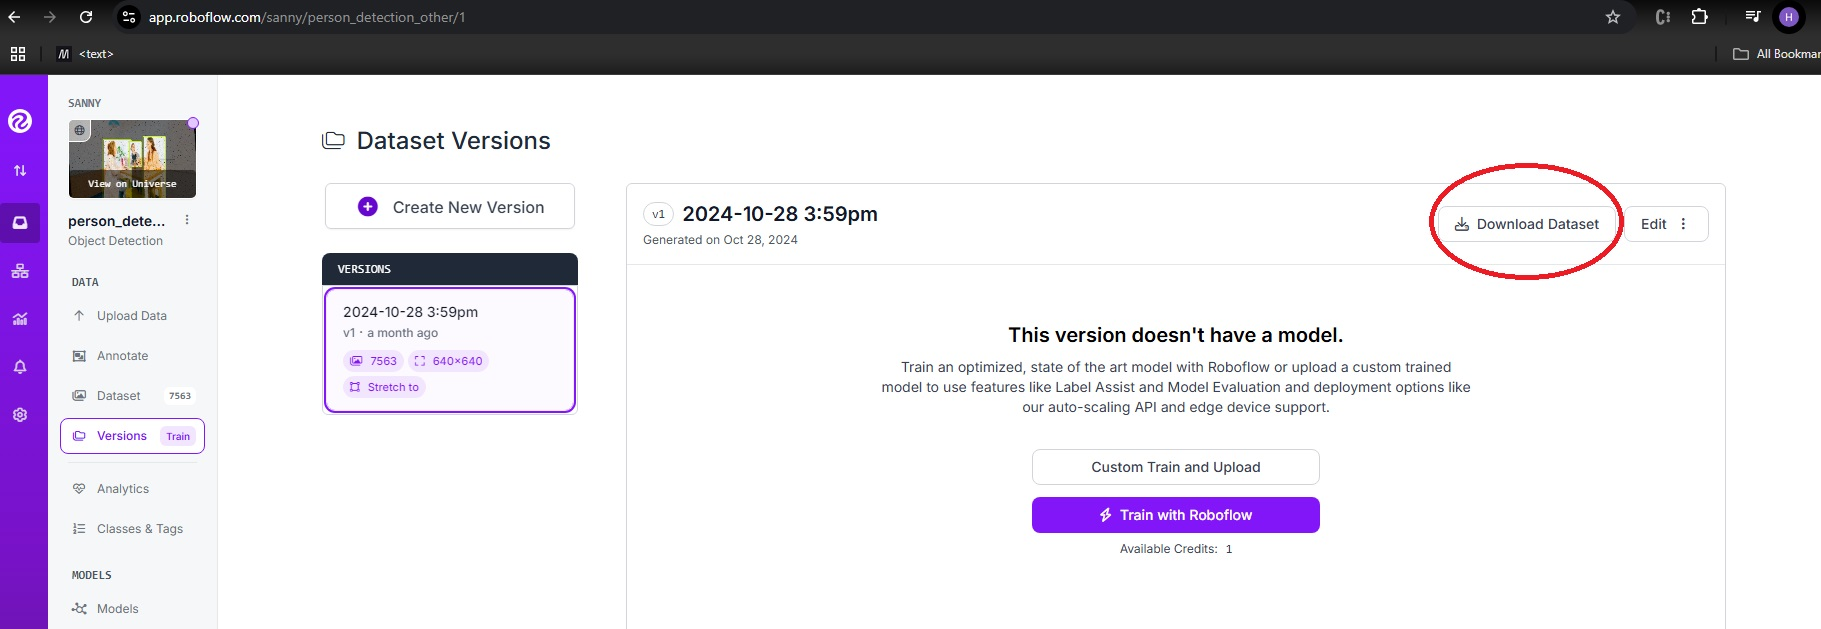

2. คัดลอกแล้วน้ำมาวางทับ cell ด้านล้าง

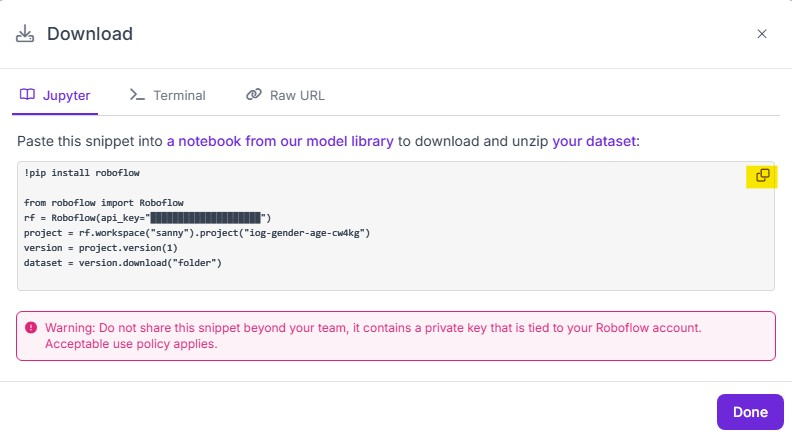


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="h9HEY6ef0VXN3hSA8y2B")
project = rf.workspace("genderdetection-vdznz").project("male-female-iefjg")
version = project.version(1)
dataset = version.download("folder")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to male-female-1 in folder:: 100%|██████████| 58653/58653 [00:11<00:00, 4982.56it/s]


เริ่มการฝึก model

In [ ]:
%cd {HOME}
!yolo task=classify mode=train model=yolo11n-cls.pt data={dataset.location} epochs=5 imgsz=224 plots=True patience=3

/content
Ultralytics 8.3.207 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/male-female-1, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=3, perspective=0.0, plots

เช็คผล model ของเราในส่วน test dataset

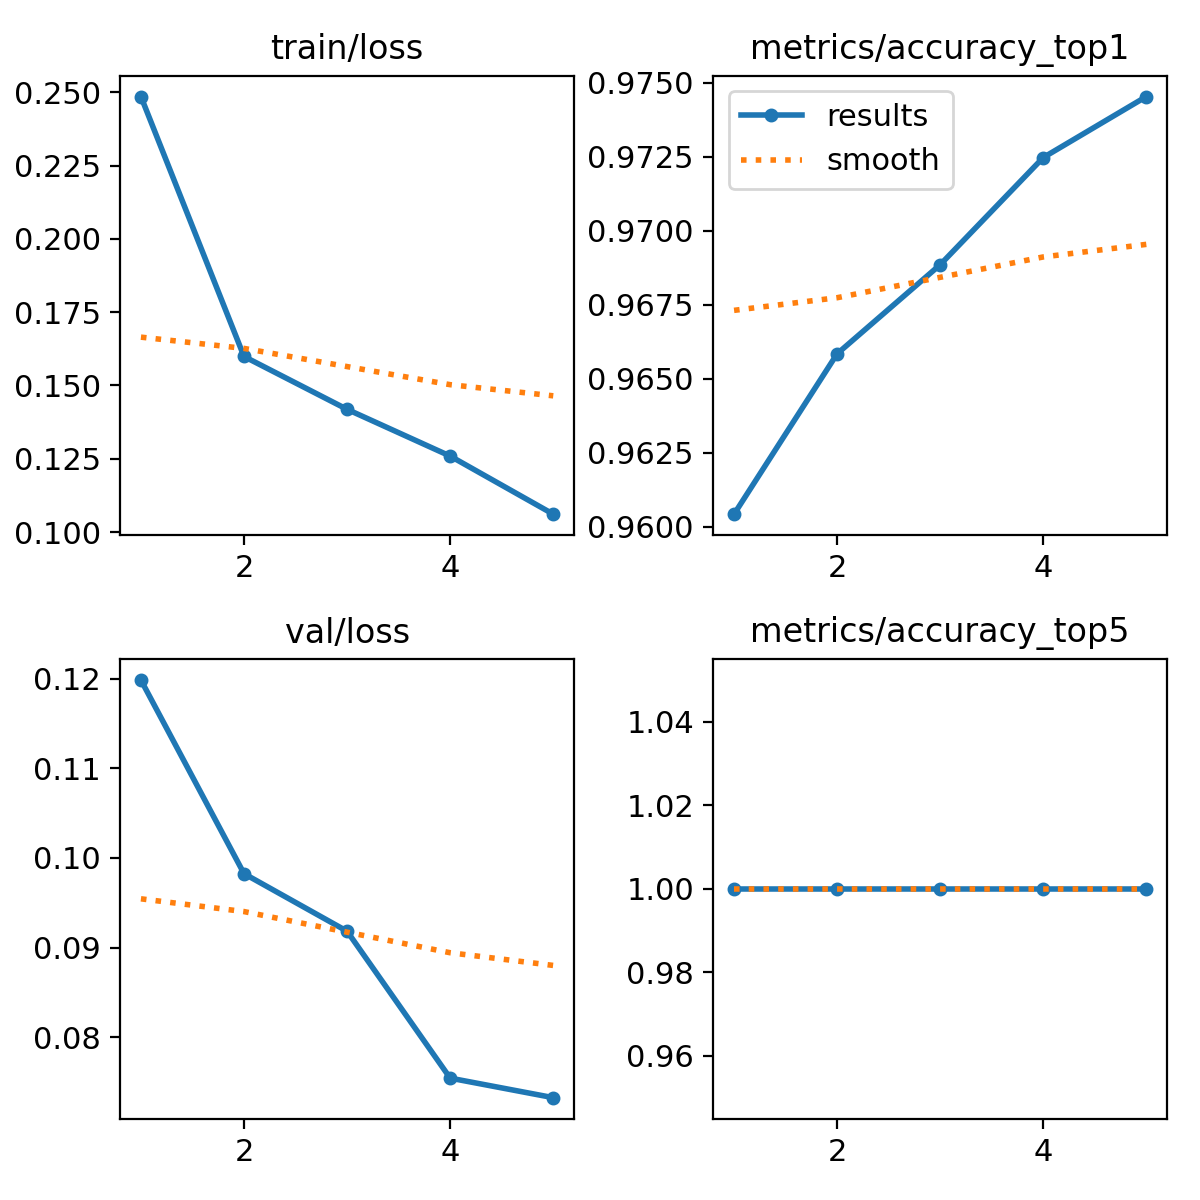

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/classify/train/results.png', width=900)

ดาวโหลด model ลงบนคอมพิวเตอร์ของเรา

In [ ]:
!yolo export model={HOME}/runs/classify/train/weights/best.pt format=onnyx
from google.colab import files

files.download('/content/runs/classify/train/weights/best.onnx')

WARNING ⚠️ Invalid export format='onnyx', updating to format='onnx'
Ultralytics 8.3.207 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
YOLO11n-cls summary (fused): 47 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs

PyTorch: starting from '/content/runs/classify/train/weights/best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 2) (3.0 MB)

ONNX: starting export with onnx 1.19.1rc1 opset 22...
ONNX: slimming with onnxslim 0.1.70...
ONNX: export success ✅ 0.7s, saved as '/content/runs/classify/train/weights/best.onnx' (5.9 MB)

Export complete (0.8s)
Results saved to /content/runs/classify/train/weights
Predict:         yolo predict task=classify model=/content/runs/classify/train/weights/best.onnx imgsz=224  
Validate:        yolo val task=classify model=/content/runs/classify/train/weights/best.onnx imgsz=224 data=/content/datasets/male-female-1  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>